In [126]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage

In [127]:
# ctx = straxbra.XebraContext()


# peaks_data = ctx.get_array(run, 'peaks')
# waveform = peaks_data['data']
# integral = peaks_data['area']
# width = peaks_data['width'][:,5]
# timestamp = peaks_data['time']
# risetime = -peaks_data['area_decile_from_midpoint'][:,1]
# area_per_channel = peaks_data['area_per_channel']

In [130]:
run_list = ['00201', '00200', '00199', '00198', '00197', '00196', '00195', '00194','00193', '00192']
kr_s1_area_all_runs = {}
kr_s2_area_all_runs = {}
kr_s1_risetime_all_runs = {}

for run in run_list:
    def CutCondition(waveform):  
        FirstPeak_area = sum(waveform[:15])
        SecondPeak_area = sum(waveform[15:])    
        if  FirstPeak_area > 100 and FirstPeak_area < 500 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
            return(True)
        else:
            return(False)


    
#     def S2_found(integral, width):

#         if integral > 500 and width >200 and width < 2000:
#             return True
#         else:
#             return False


    def Process(waveform, i): 
        SelectionCutFlag = CutCondition(waveform[i])
        if SelectionCutFlag == True:
#             kr_s1_area.append(integral[i])
#             kr_s1_risetime.append(risetime[i])
            
            j = 1
            counter_timestamp = timestamp[i+j]
            threshold_timestamp = timestamp[i] + 45000
            while threshold_timestamp >= counter_timestamp and  S2_found(integral = integral[i+j], width = width[i+j]) == False:  
                j += 1
                counter_timestamp = timestamp[i+j]
            else:
                if S2_found(integral = integral[i+j], width = width[i+j]):
                    #PrintWaveform(waveform, i)
                    kr_s1_area.append(integral[i])
                    kr_s1_risetime.append(risetime[i])
                    kr_s2_area.append(integral[i+j])

            return
        else:
            return
                
    ctx = straxbra.XebraContext()
    peaks_data = ctx.get_array(run, 'peaks')
    waveform = peaks_data['data']
    integral = peaks_data['area']
    width = peaks_data['width'][:,5]
    timestamp = peaks_data['time']
    risetime = -peaks_data['area_decile_from_midpoint'][:,1]
    area_per_channel = peaks_data['area_per_channel']
    
    kr_s1_area = []
    kr_s1_risetime = []
    kr_s2_area = []

    num = len(waveform)
    print_counter = 0.0
    for i in range(0,num):    
        Process(waveform,i)
        if i/num >= print_counter:
            print(round(print_counter,2), end = ' ')
            print_counter += 0.1
    print(1.0, '        Run ',run, 'done!')
    
    kr_s1_area_all_runs.update({run:kr_s1_area})
    kr_s1_risetime_all_runs.update({run:kr_s1_risetime})
    kr_s2_area_all_runs.update({run:kr_s2_area})

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00201 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00200 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00199 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00198 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00197 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00196 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00195 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00194 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00193 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00192 done!


In [131]:
print(kr_s1_area_all_runs['00196'][:10])

[221.66325, 527.0925, 309.10175, 304.58078, 258.2571, 264.21448, 519.66315, 236.60234, 228.04857, 231.2361]


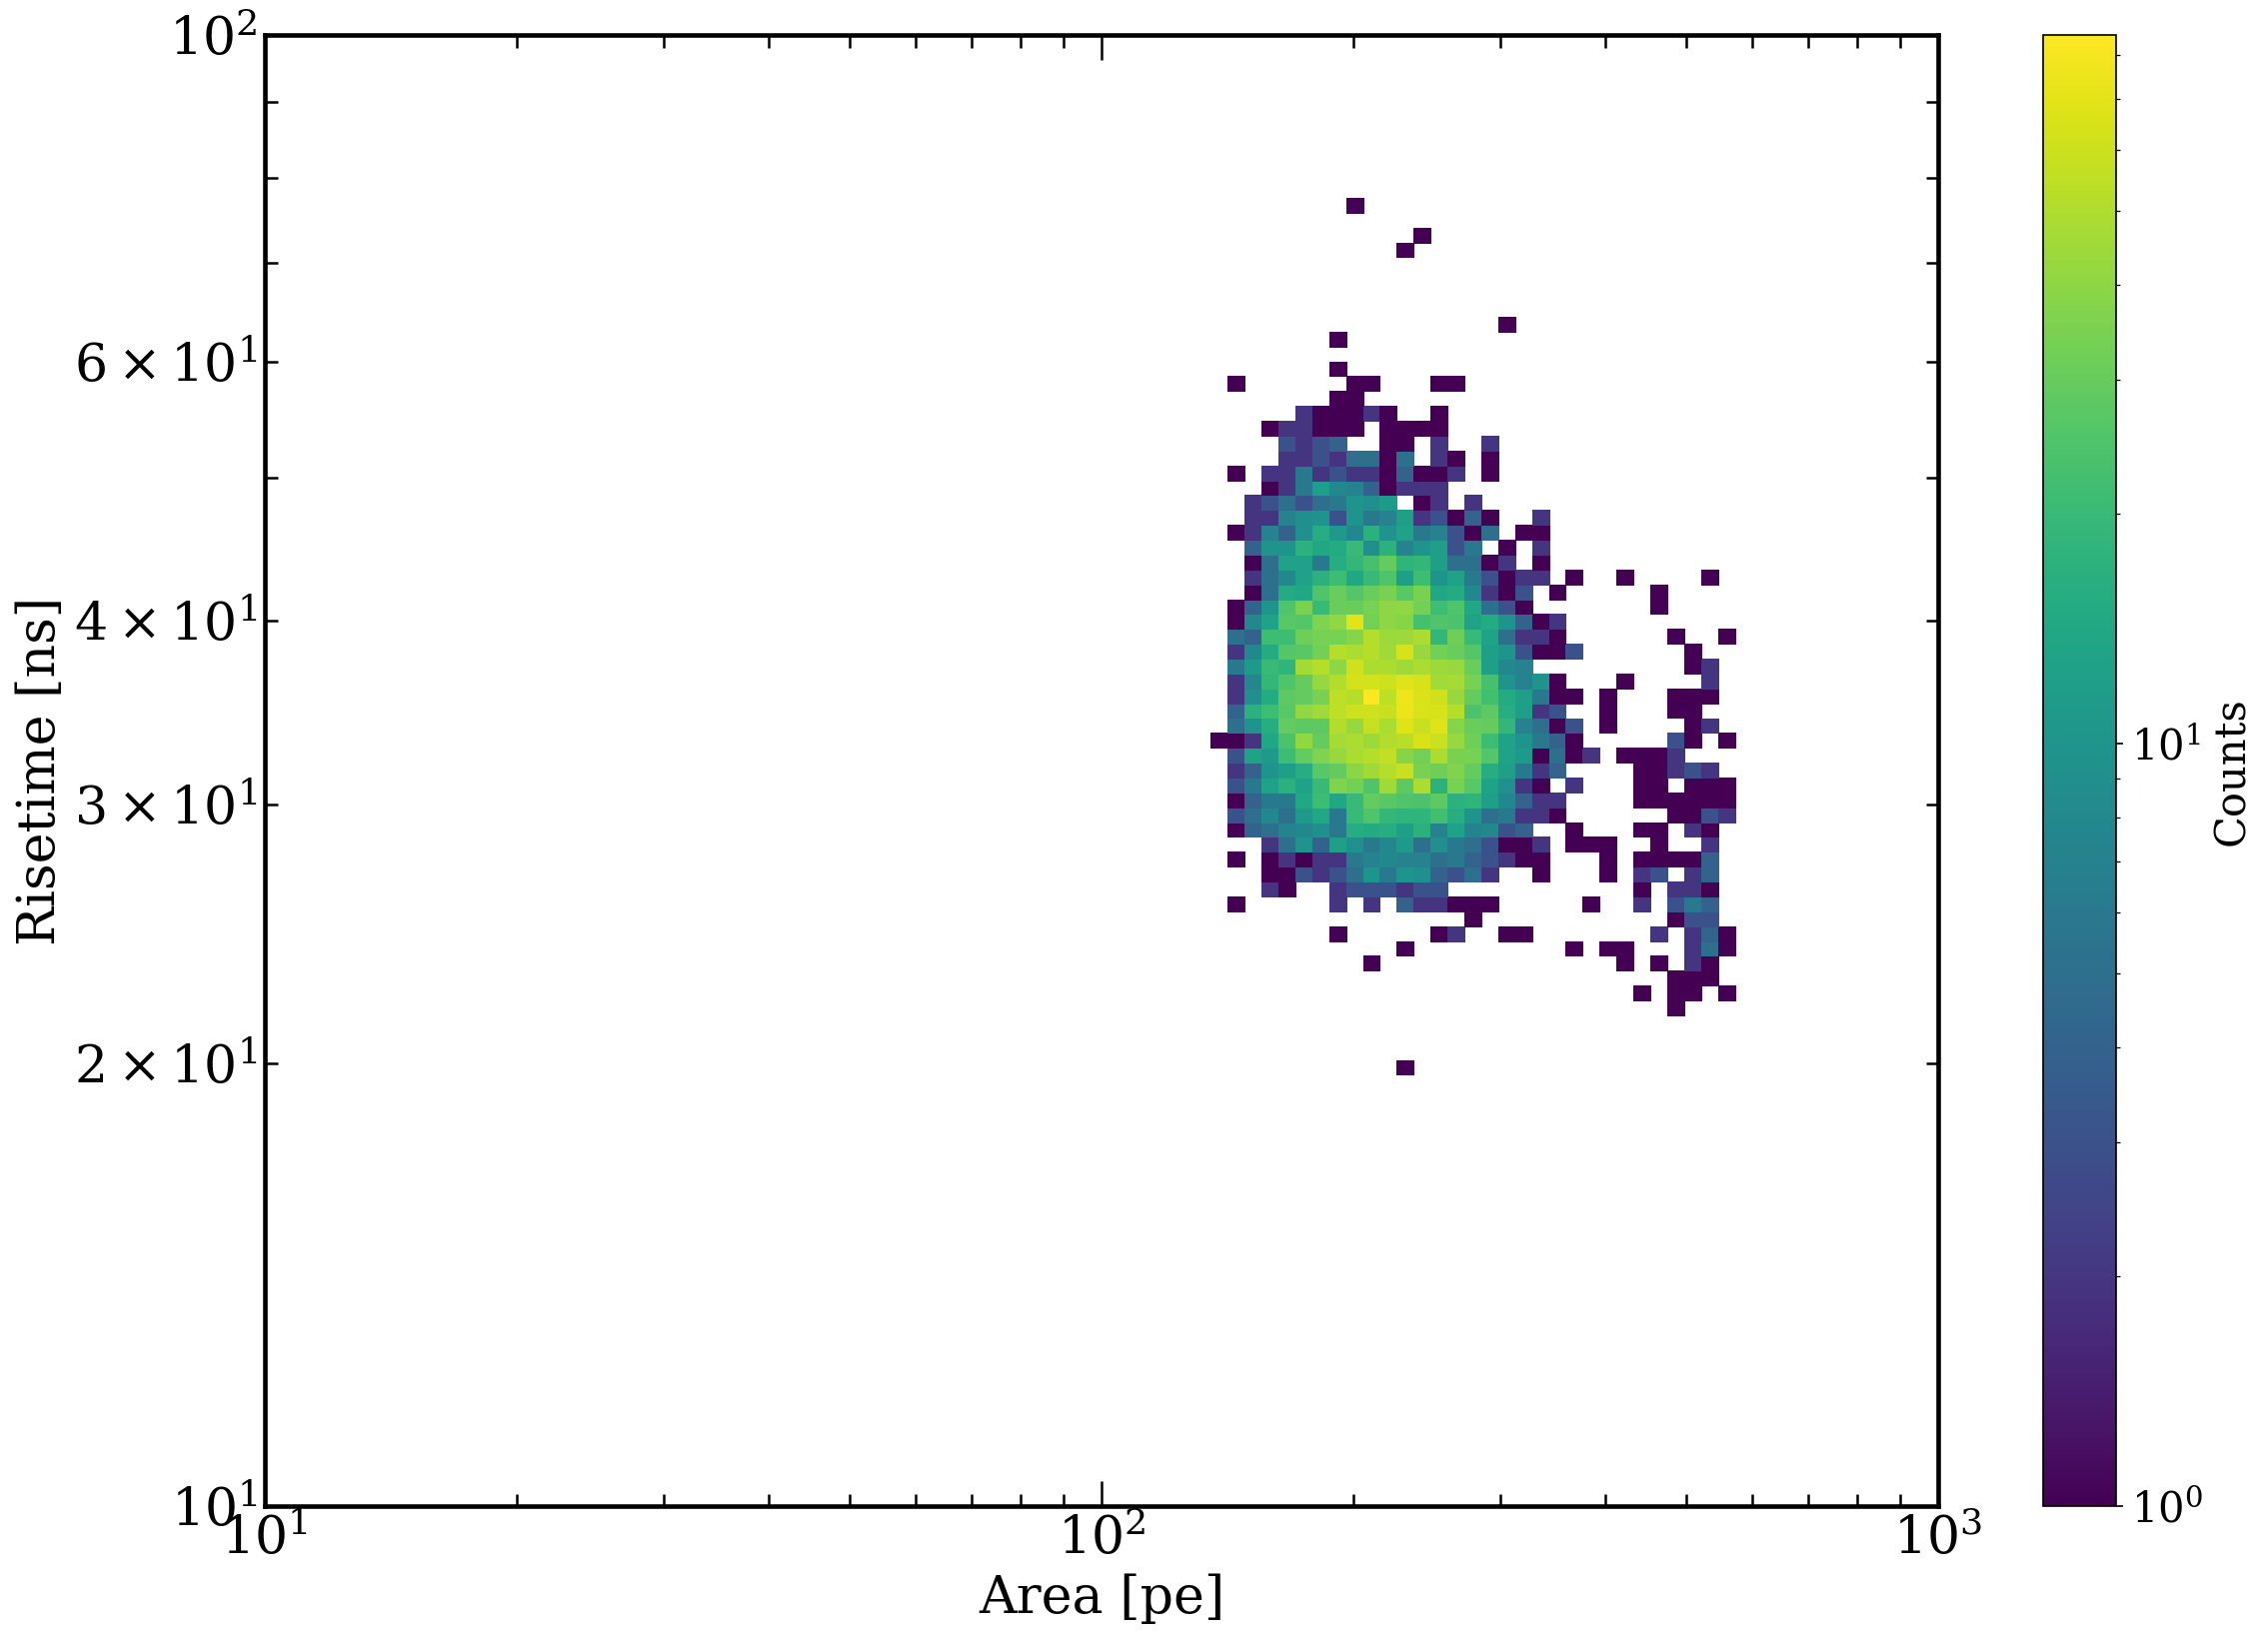

In [132]:
fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

bins_x = np.logspace(1,3,100)
bins_y = np.logspace(1,2,100)
histo_max= 2*10**3



counts, _, _ = np.histogram2d(kr_s1_area_all_runs['00192'], kr_s1_risetime_all_runs['00192'], bins=(bins_x, bins_y))
im = axes.pcolormesh(bins_x, bins_y, counts.T, norm=LogNorm())
cb = plt.colorbar(im, ax=axes, label='Counts/bin')
cb.set_label('Counts',size=20)
cb.ax.tick_params(labelsize=20)
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('Area [pe]')
axes.set_ylabel('Risetime [ns]')



plt.show()


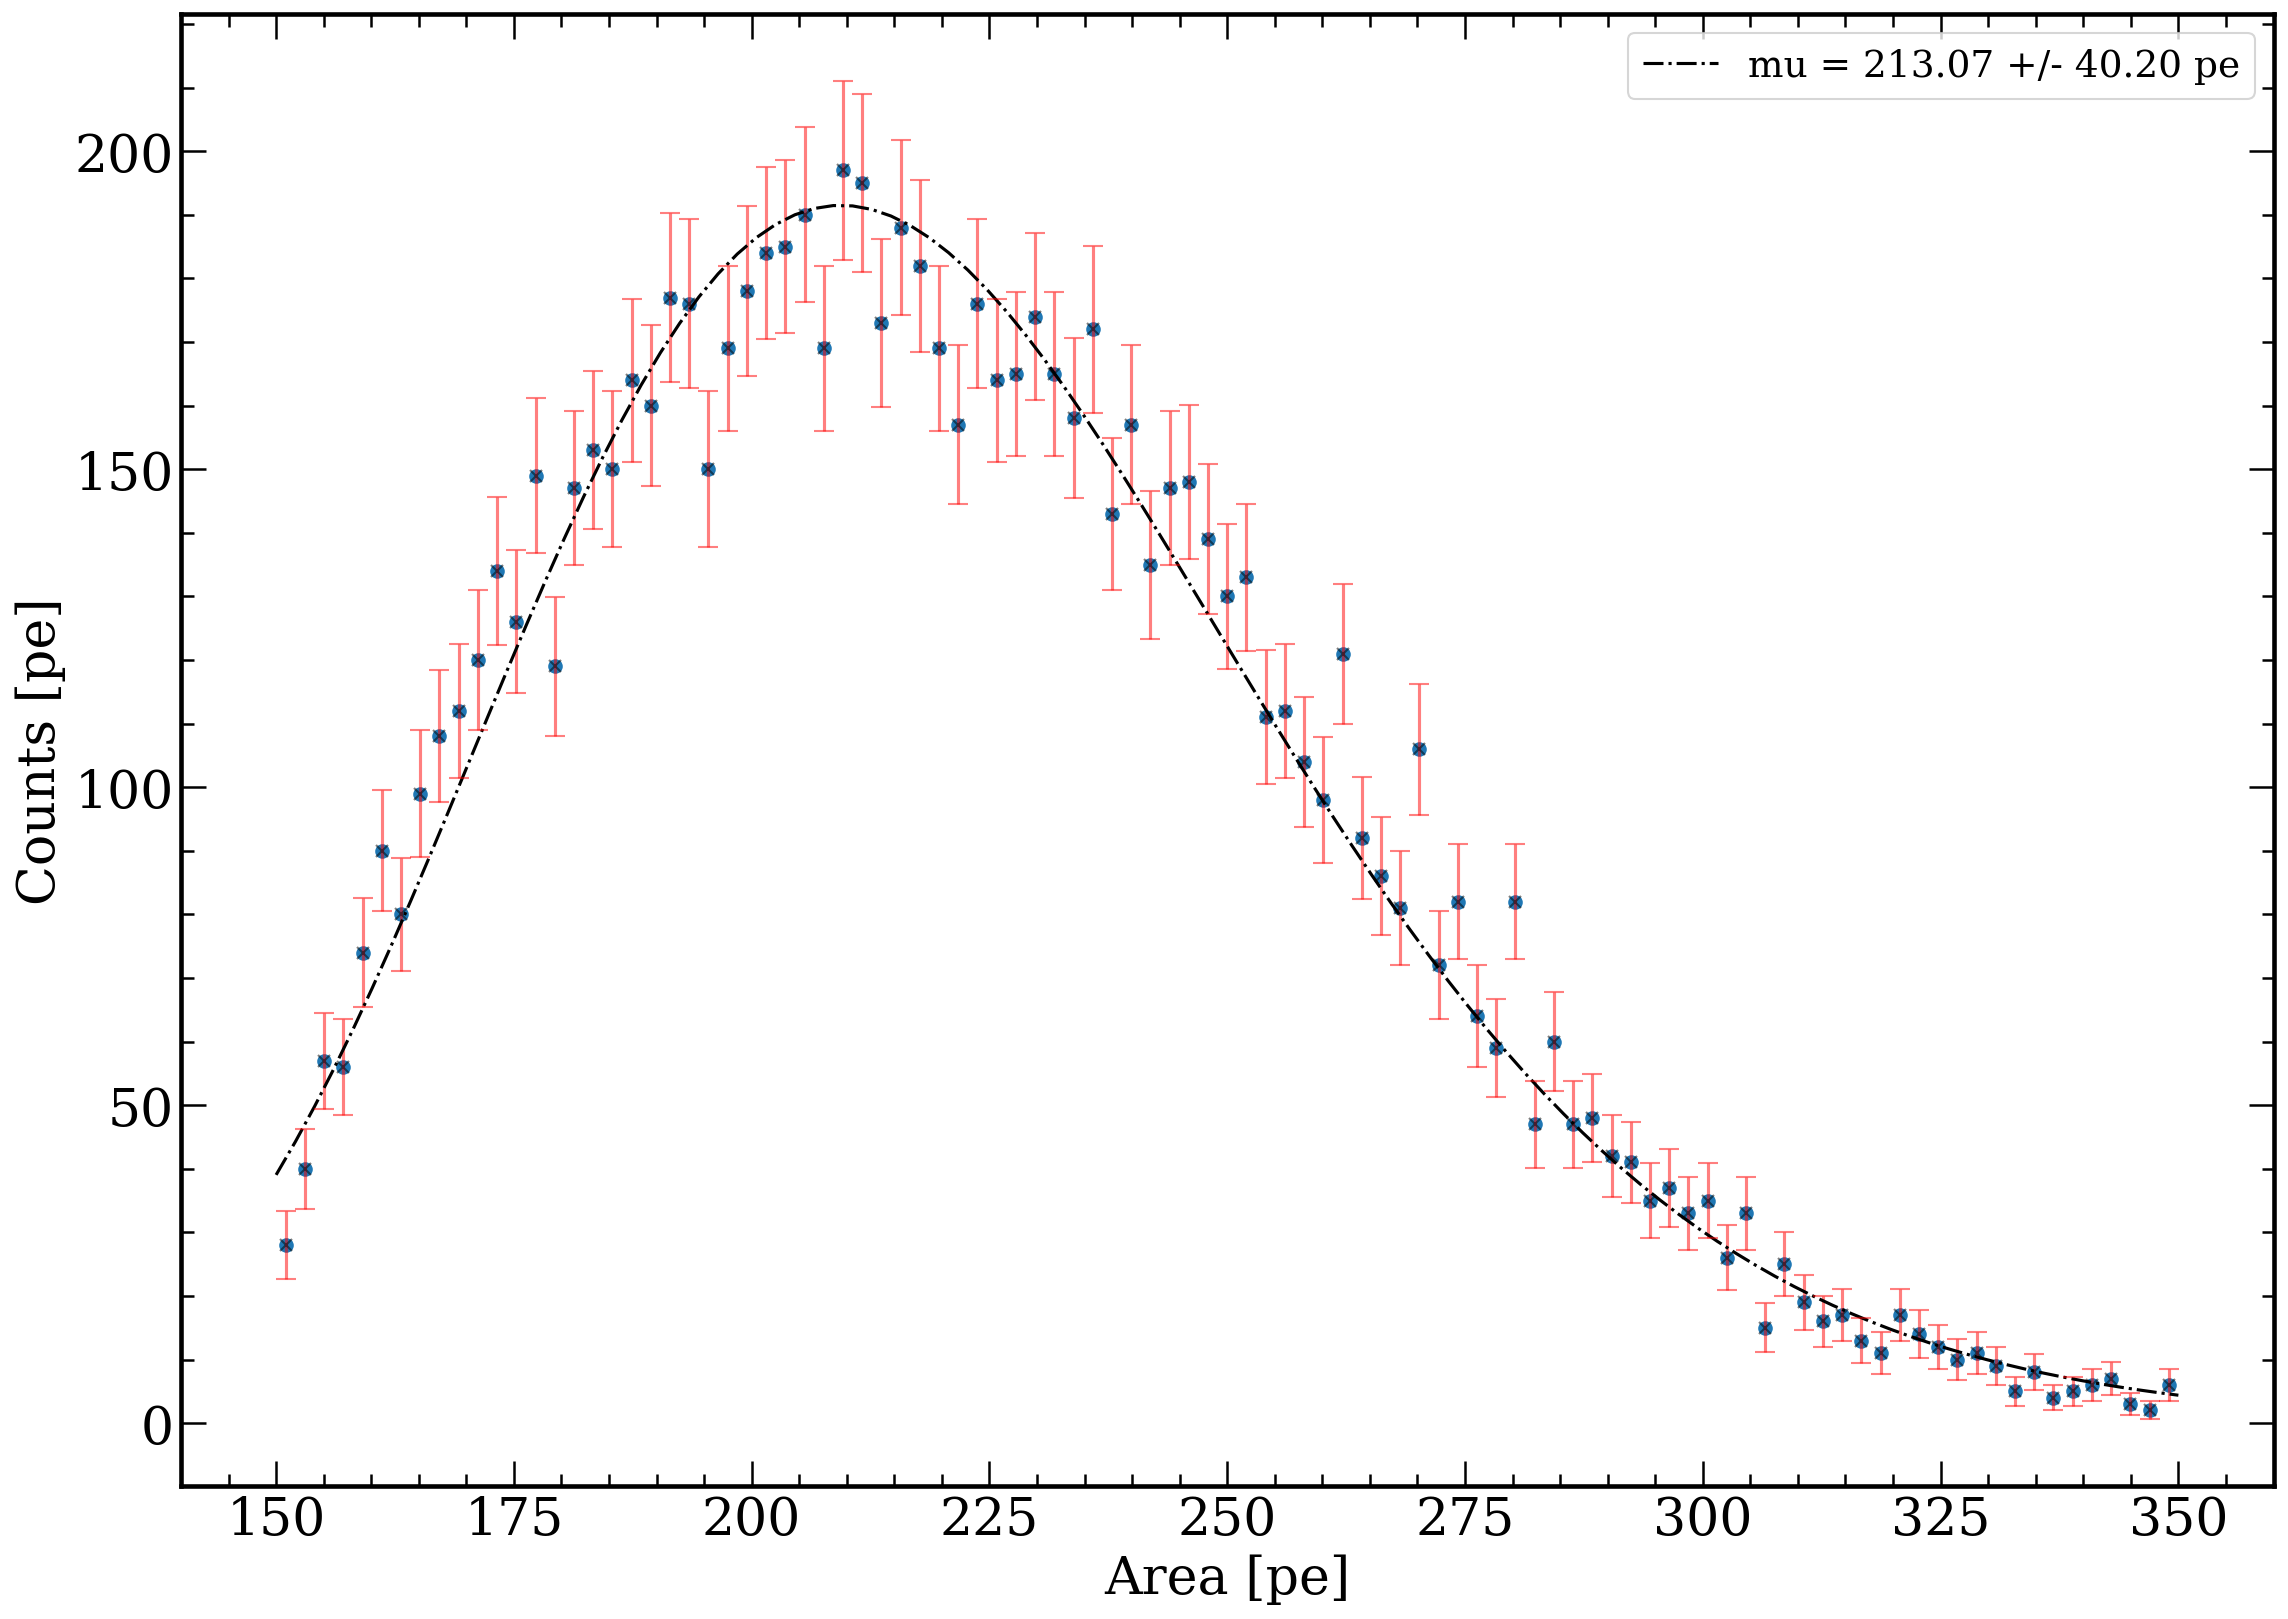

light yield =  5.196866225963688 +/-  0.9804298695899334


In [133]:
fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

x_range = np.linspace(150,350,100)
p0 = [10,10,1]
def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return gaus

counts, binEdges = np.histogram(kr_s1_area_all_runs['00192'], bins=x_range)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
popt, pcov= curve_fit(single_gaus, bincenters, counts, p0,  sigma=np.maximum(np.sqrt(counts), np.ones_like(counts)))

S1_mu = np.exp(popt[1]+((popt[2]**2)/2))
S1_mu_str = "%.2f" % S1_mu
S1_sigma = np.exp(popt[1]+((popt[2]**2)/2))    * np.sqrt(np.exp(popt[2]**2)-1)
S1_sigma_str = "%.2f" % S1_sigma

axes.scatter(bincenters, counts)
axes.plot(x_range, single_gaus(x_range, *popt), color = 'k', linestyle = '-.',label = 'mu = '+str(S1_mu_str)+ ' +/- '+str(S1_sigma_str)+' pe')
axes.errorbar(bincenters, counts, yerr=np.sqrt(counts), ecolor='red', marker= 'x',capsize=5, color = 'k', alpha = 0.5, linestyle='None')
#axes.legend(loc=1, prop={'size': 18})
axes.legend(loc =1, prop={'size': 18})
axes.set_xlabel('Area [pe]')
axes.set_ylabel('Counts [pe]')
plt.show()
print('light yield = ', S1_mu/41, '+/- ', S1_sigma/41)

In [134]:
CE_bot = 0.95
QE_bot = 0.325
CE_top = 0.7
QE_top = 0.3
LCE = 0.2954

LCE_top = 0.0384
LCE_bot = 0.2570

NEST_array = np.load("./Light_yield_NEST.npy")

photon_yield_list = NEST_array["photon_yield"][(NEST_array["energy_deposition"] == 41)]
photon_yield_list = list(photon_yield_list)


ly_top_list = []
ly_bot_list = []
drift_field = [50,100,150,200,250,300,350,400,450,500]



for photon_yield in photon_yield_list:    
    Light_yield_top = QE_top * CE_top * LCE_top * photon_yield
    #print(Light_yield_top_9keV)
    ly_top_list.append(Light_yield_top)


for photon_yield in photon_yield_list:    
    Light_yield_bot = QE_bot * CE_bot * LCE_bot * photon_yield
    #print(Light_yield_top_9keV)
    ly_bot_list.append(Light_yield_bot)    

Sum_ly =[x + y for x, y in zip(ly_bot_list, ly_top_list)]




print(Sum_ly)

[5.02301596873474, 4.637866877174377, 4.371058651364327, 4.159278536320686, 3.984528396739006, 3.830985212397575, 3.6975259129915234, 3.5873096339330672, 3.48078934990406, 3.3874421336879728]


/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


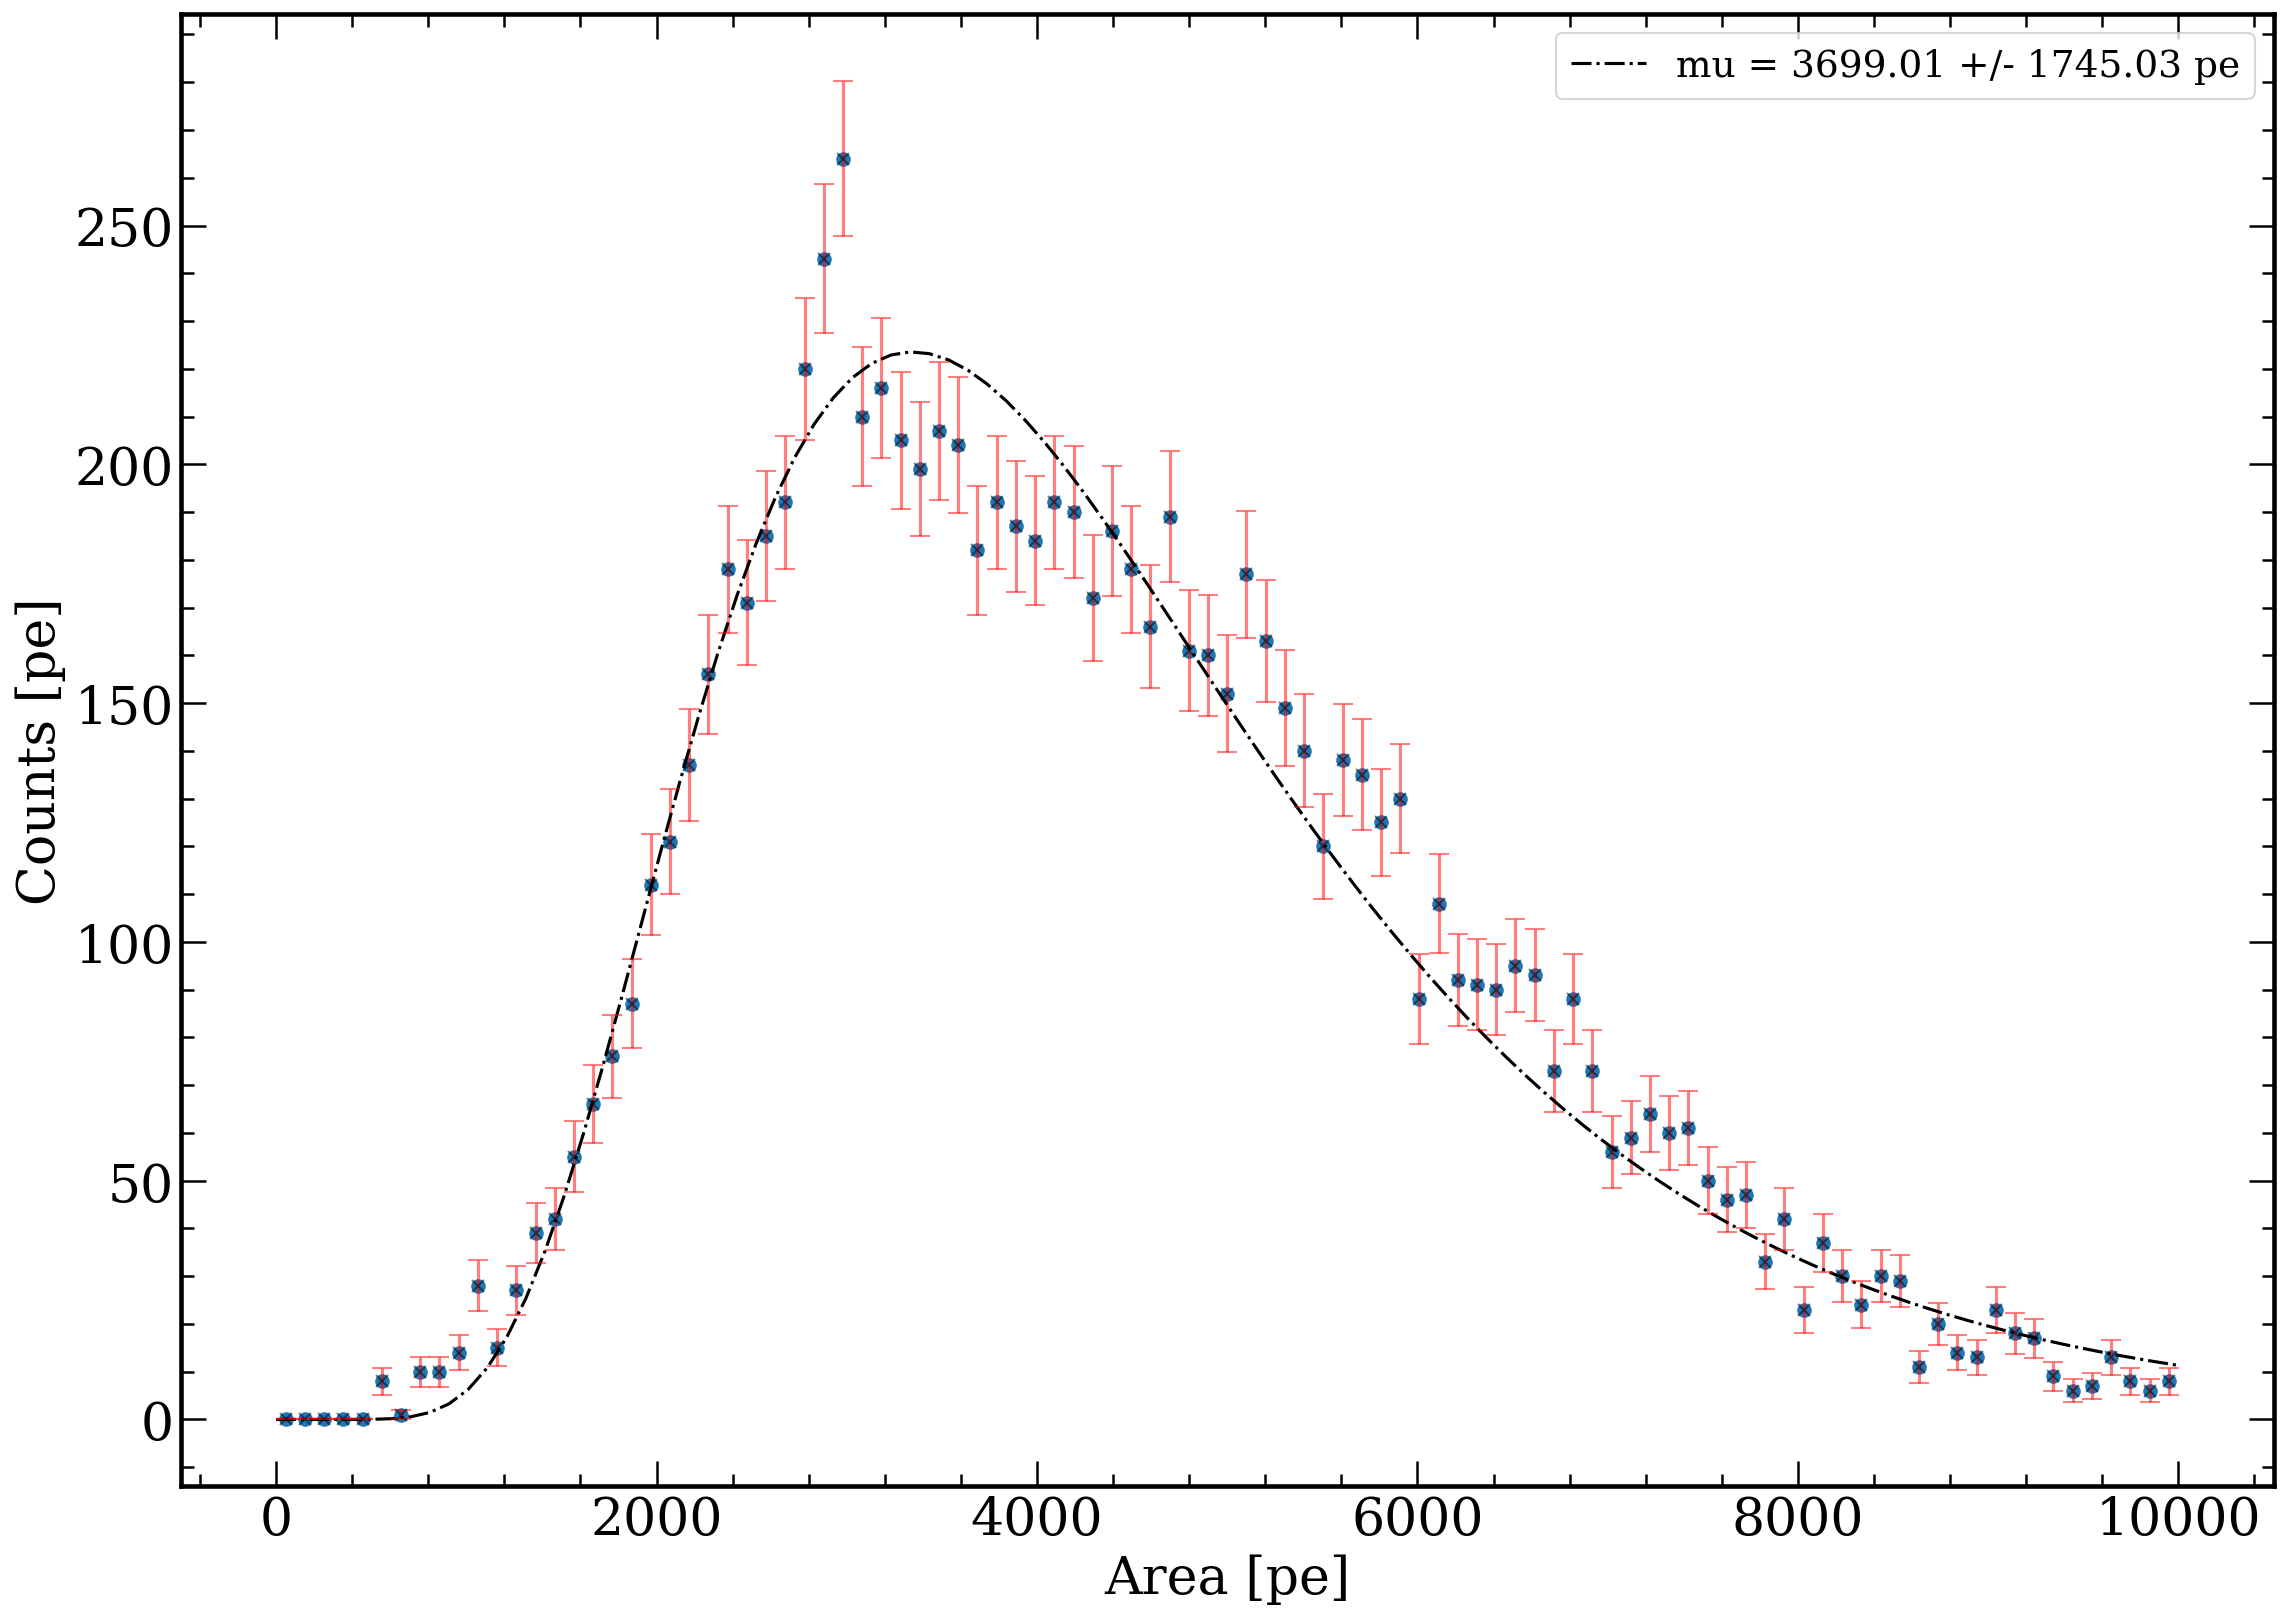

S2/E = 90.21972799581508 +/- 42.56169311738535


In [142]:
fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

x_range = np.linspace(0,10000,100)
p0 = [10,10,1]
def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return gaus

counts, binEdges = np.histogram(kr_s2_area_all_runs['00192'], bins=x_range)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
popt, pcov= curve_fit(single_gaus, bincenters, counts, p0,  sigma=np.maximum(np.sqrt(counts), np.ones_like(counts)))

S2_mu = np.exp(popt[1]+((popt[2]**2)/2))
S2_mu_str = "%.2f" % S2_mu
S2_sigma = np.exp(popt[1]+((popt[2]**2)/2))    * np.sqrt(np.exp(popt[2]**2)-1)
S2_sigma_str = "%.2f" % S2_sigma

axes.scatter(bincenters, counts)
axes.plot(x_range, single_gaus(x_range, *popt), color = 'k', linestyle = '-.',label = 'mu = '+str(S2_mu_str)+ ' +/- '+str(S2_sigma_str)+' pe')
axes.errorbar(bincenters, counts, yerr=np.sqrt(counts), ecolor='red', marker= 'x',capsize=5, color = 'k', alpha = 0.5, linestyle='None')
#axes.legend(loc=1, prop={'size': 18})
axes.legend(loc =1, prop={'size': 18})
axes.set_xlabel('Area [pe]')
axes.set_ylabel('Counts [pe]')
plt.show()
print('S2/E =', S2_mu/41, '+/-', S2_sigma/41)

light yield =  5.964016456244557 +/-  1.0856888334115977
light yield =  5.905635489770012 +/-  1.0981135833464113
light yield =  5.875378934126112 +/-  1.1798206112017098
light yield =  5.686917491118094 +/-  1.0591161738420012
light yield =  5.527071252468941 +/-  1.0111317542715512
light yield =  5.474541624397718 +/-  1.018287594544746
light yield =  5.391807402887721 +/-  0.9933740640027061
light yield =  5.308206402080192 +/-  0.9864774262064169
light yield =  5.228749748107432 +/-  0.9709868856951717
light yield =  5.196866225963688 +/-  0.9804298695899334


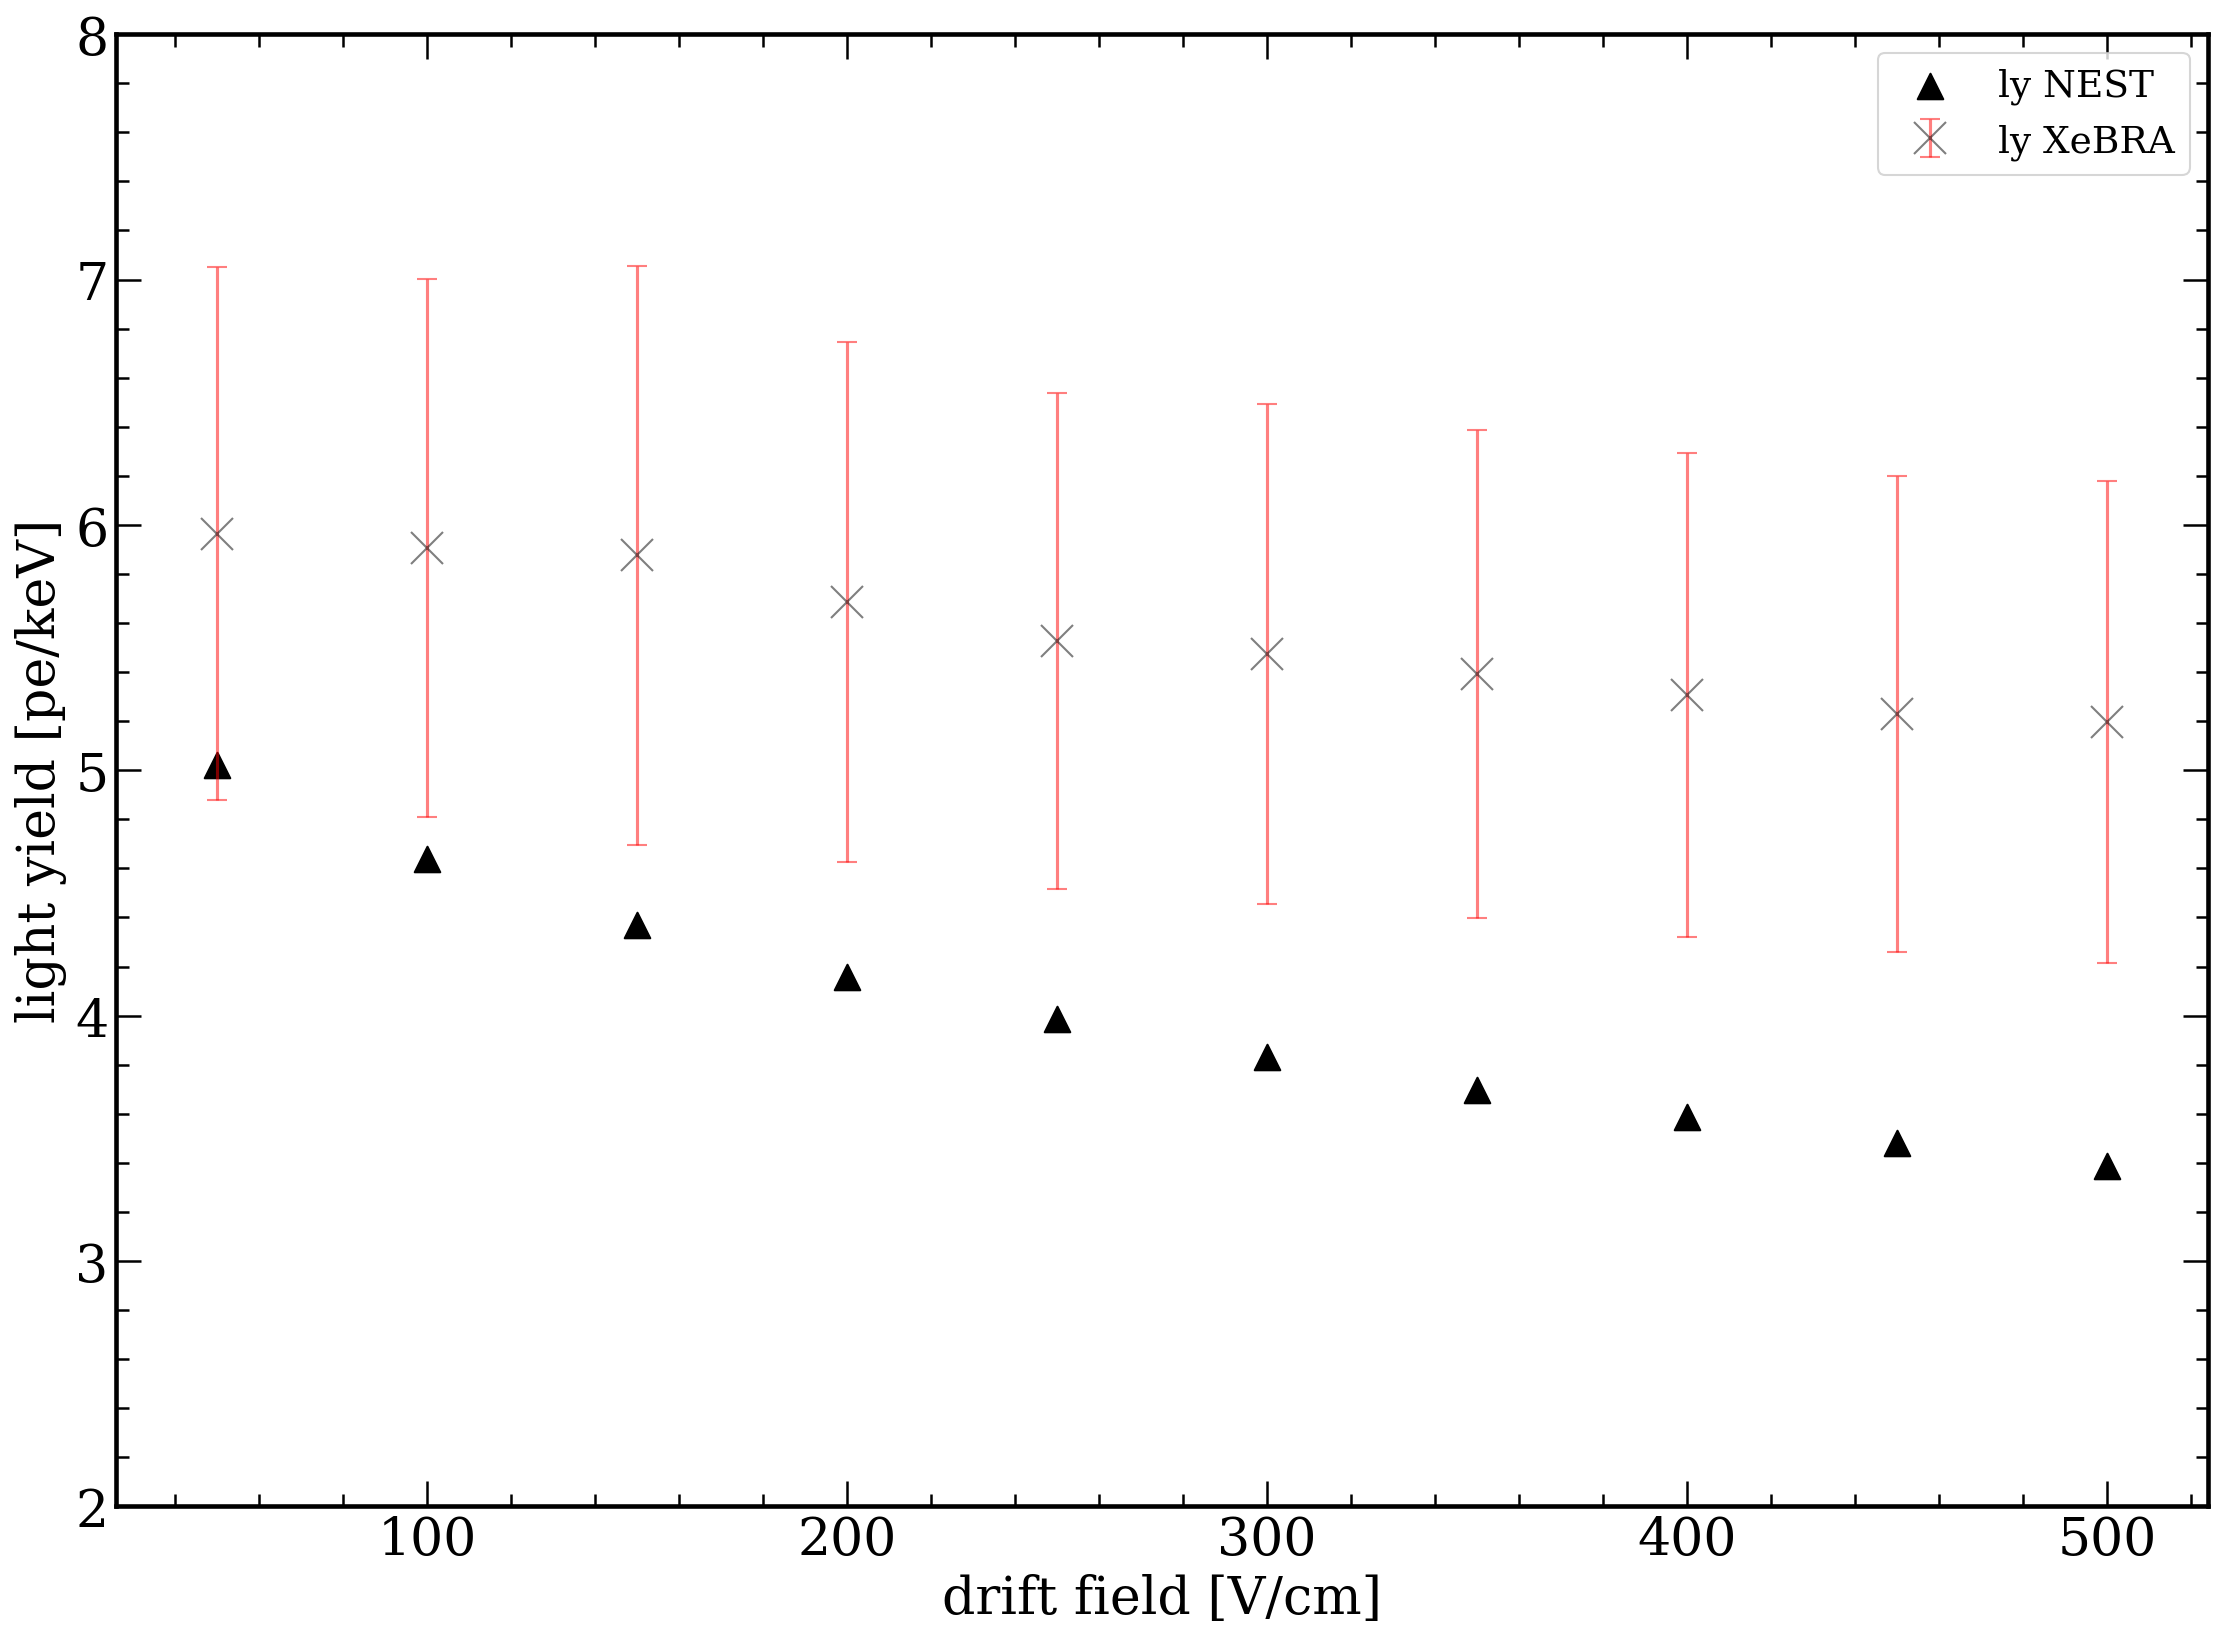

In [136]:
fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

Drift_field = [50,100,150,200,250, 300, 350, 400, 450, 500]
p0 = [10,10,1]
def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return gaus

kr_runlist = ['00201', '00200', '00199', '00198', '00197', '00196', '00195', '00194','00193', '00192']
kr_s1_mu_all_runs = {}
kr_s2_sigma_all_runs = {}
ly_list = []
ly_sigma_list = []
ly_error_on_fit_list = []

for kr_run in kr_runlist:
    x_range = np.linspace(150,350,100)
    counts, binEdges = np.histogram(kr_s1_area_all_runs[kr_run], bins=x_range)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    popt, pcov= curve_fit(single_gaus, bincenters, counts, p0,  sigma=np.maximum(np.sqrt(counts), np.ones_like(counts)), maxfev = 10000)
    perr = np.sqrt(np.diag(pcov))
    S1_mu = np.exp(popt[1]+((popt[2]**2)/2))
    S1_mu_str = "%.2f" % S1_mu
    S1_sigma = np.exp(popt[1]+((popt[2]**2)/2))    * np.sqrt(np.exp(popt[2]**2)-1)
    S1_sigma_str = "%.2f" % S1_sigma
    
    
    x_range = np.linspace(0,35000,100)
    counts, binEdges = np.histogram(kr_s1_area_all_runs[kr_run], bins=x_range)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    popt, pcov= curve_fit(single_gaus, bincenters, counts, p0,  sigma=np.maximum(np.sqrt(counts), np.ones_like(counts)), maxfev = 10000)
    
#     error_on_ly_fit = np.sqrt((1/41)**2 * perr[1]**2)
#     error_on_ly_fit = "%.2f" % error_on_ly_fit
    
    
#     kr_s1_mu_all_runs.update({run:S1_mu})
#     kr_s2_sigma_all_runs.update({run:S1_sigma})
    print('light yield = ', S1_mu/41, '+/- ', S1_sigma/41)
    ly_list.append(S1_mu/41)
    ly_sigma_list.append(S1_sigma/41)
    ly_error_on_fit_list.append(error_on_ly_fit)
    
#print(ly_error_on_fit_list)

axes.set_ylim([2,8])
axes.errorbar(Drift_field, ly_list, yerr = ly_sigma_list,c = 'k',capsize=5, markersize='15', marker = 'x', fmt='.', ecolor='red', alpha = 0.5, label='ly XeBRA')
axes.scatter(Drift_field, Sum_ly, c = 'k', marker = '^', s = 150, label = 'ly NEST' )
axes.set_xlabel('drift field [V/cm]')
axes.set_ylabel('light yield [pe/keV]')
axes.legend(loc = 1, prop={'size': 18})
plt.show()